# 0. Import Modules and Setup Global Variables

In [1]:
from METR4911_package import *
import cv2, os
import numpy as np
import math as m
%matplotlib inline

# 1. Detect Static Image

---------------- FINGER CLASS ----------------
SIDE: [0.0, 'Person', 0.8751519, 0, 203, 318, 432]
TOP: None

---------------- FRUIT/VEGETABLES ----------------
SIDE: [0.0, 'Banana', 0.9573536, 305, 155, 568, 322]
TOP: None

FRUIT/VEGETABLE STATS
-------------------------------------------------
Banana area (cm2): 34.70987654320987
Banana volume (cm3): 173.65303684958724
Banana mass (grams): 109.40141321523996
Banana calories: 97.36725776156356
-------------------------------------------------
Number of pixels in 1cm line: 18
Number of pixels in 1cm x 1cm square: 324


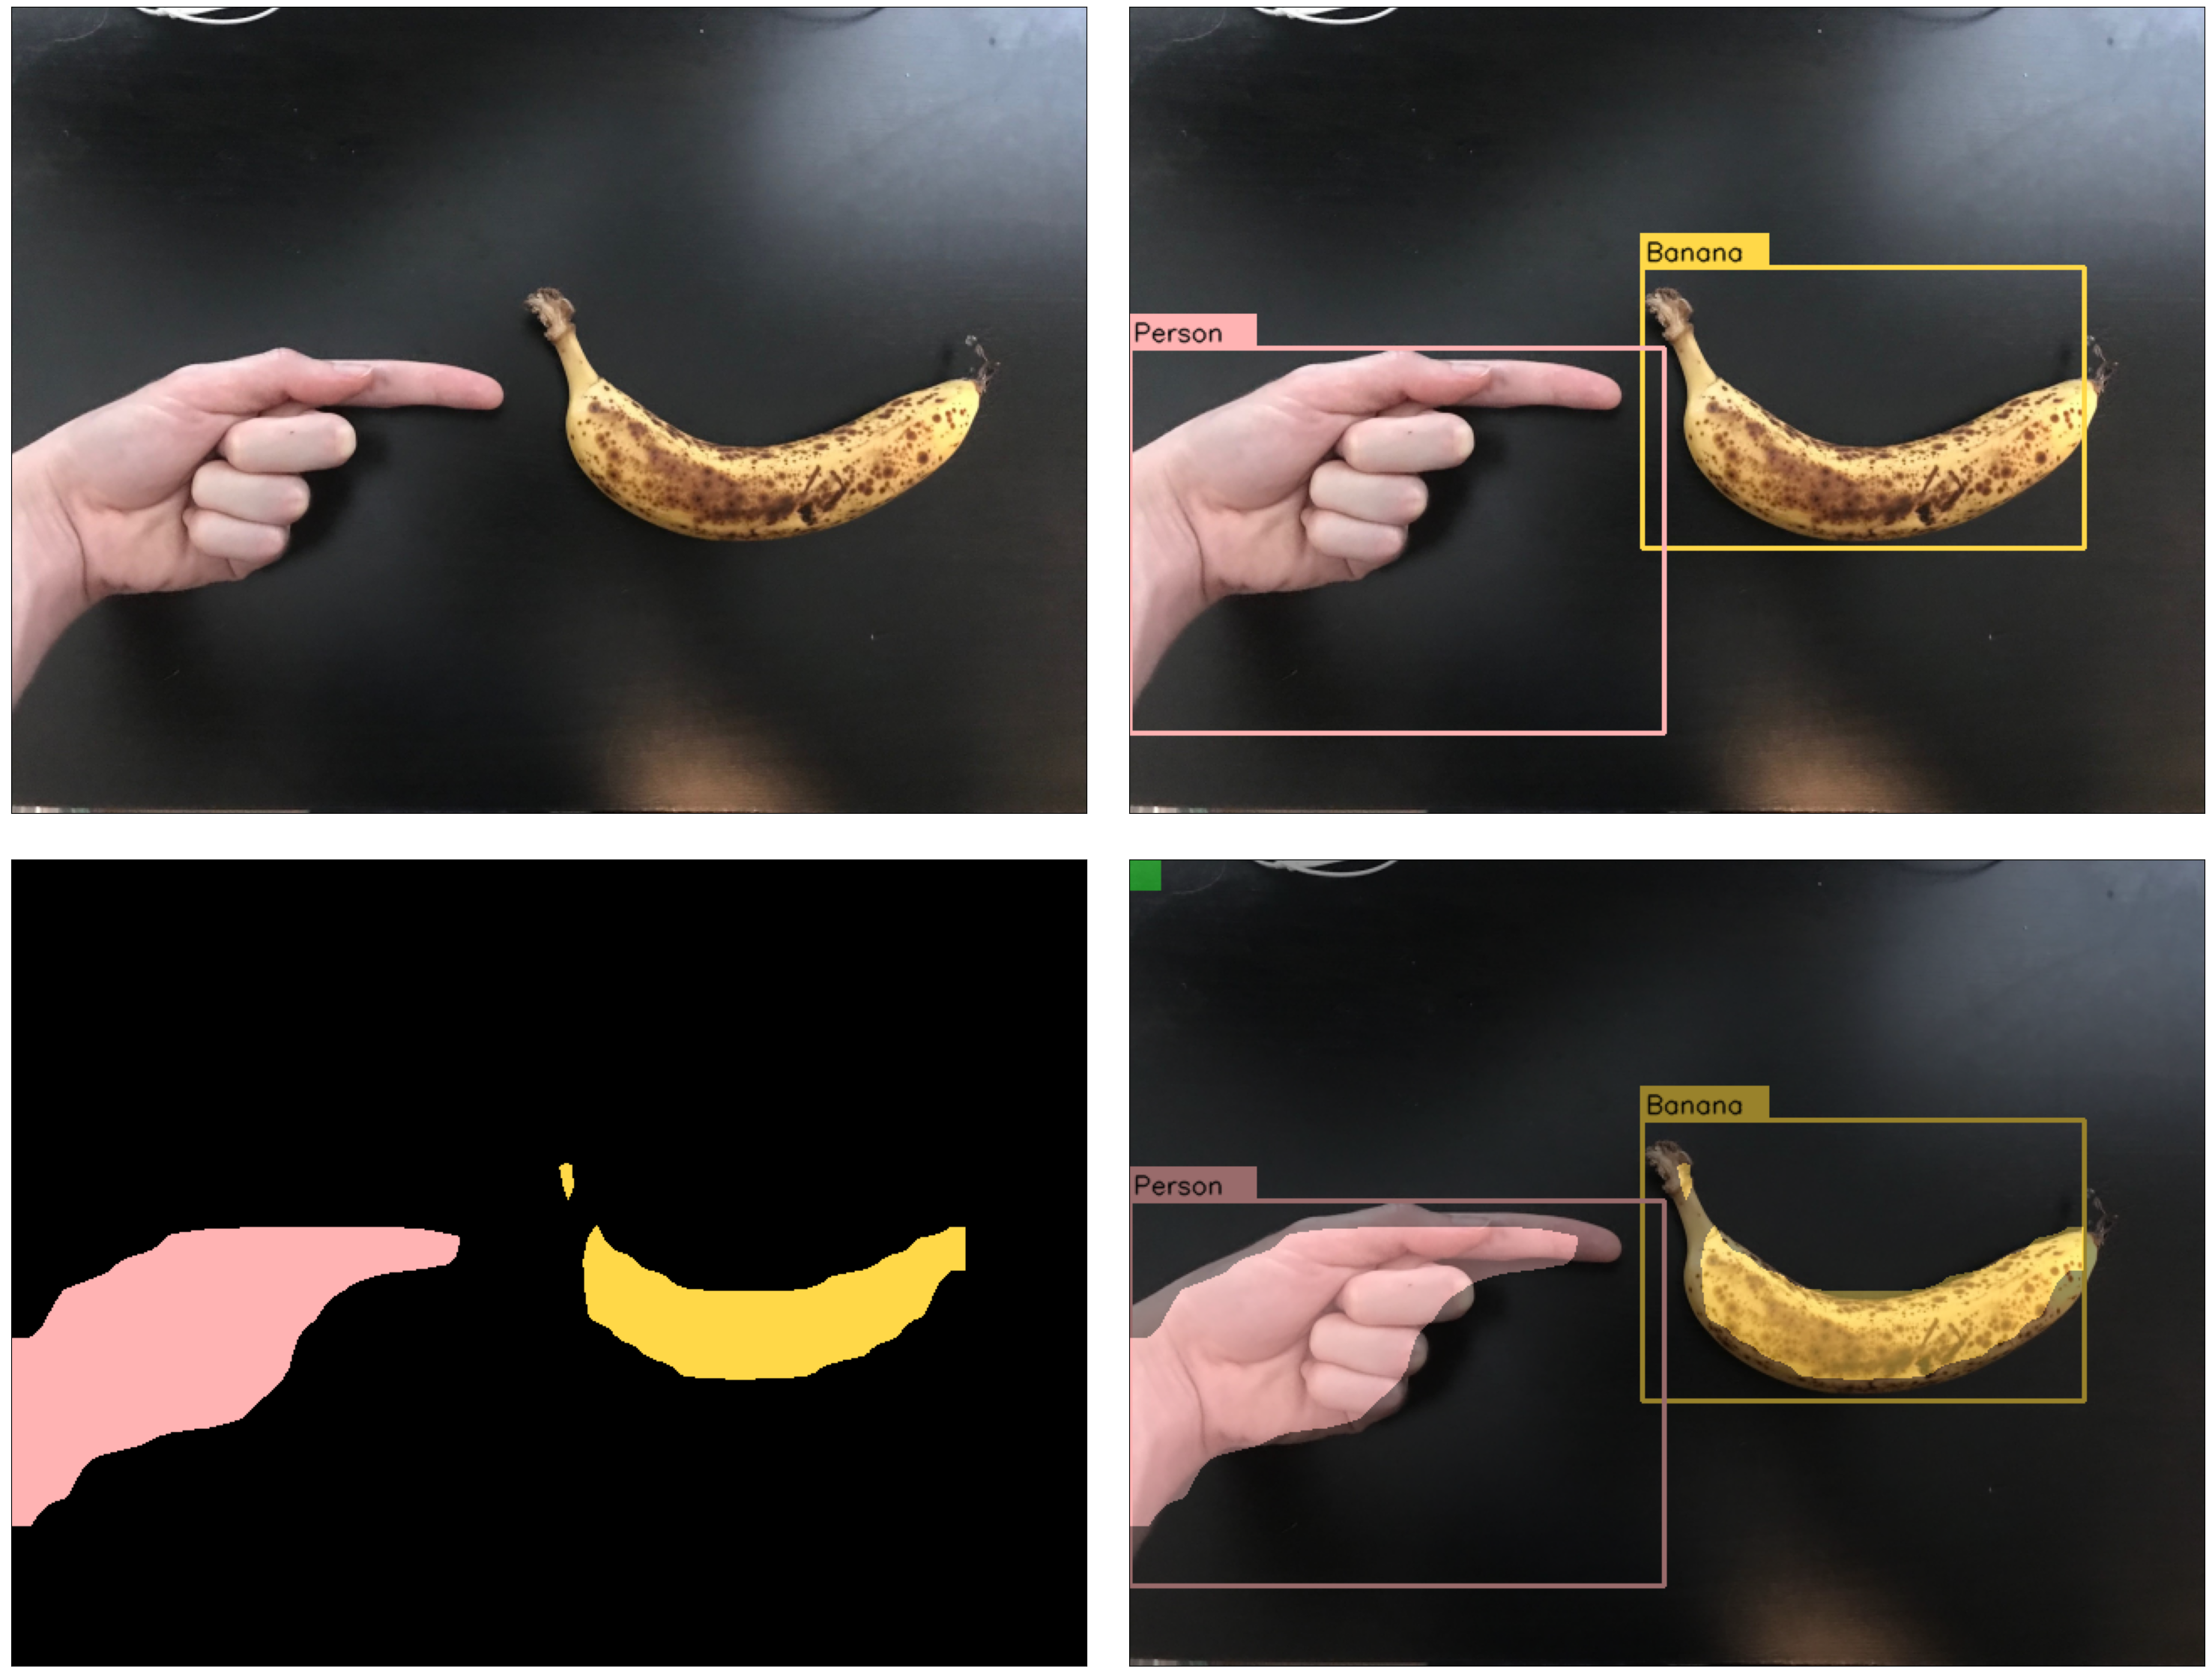

In [2]:
img_file = "banana1_153grams_ver3.jpg"
img_path = os.path.join("WebCam_images", "banana_test", img_file)

object_detect_img(img_path)